In [6]:
from collect_data_gen import create_dataloader
from pstd.sd.diffusion import Diffusion
from vae import VAE
from pipeline_gen import generate
import os

from matplotlib import pyplot as plt

In [2]:
# Константы
DATASET_FOLDER = 'game_images_dataset'  # Папка для хранения данных
DATASET_SIZE = 1000  # Количество изображений в датасете
SEQUENCE_LENGTH = 5  # Длина последовательности
IMAGE_HEIGHT = 240  # Установите нужные размеры для изображений
IMAGE_WIDTH = 256
IMAGE_CHANNELS = 3
DATASET_FILENAME = 'game_dataset_gen.npy'  # Имя файла для хранения всех изображений и действий
BATCH_SIZE = 1  # Размер батча для DataLoader

In [3]:
dataloder = create_dataloader(os.path.join(DATASET_FOLDER, DATASET_FILENAME),batch_size=BATCH_SIZE,shuffle=True)
dataset = dataloder.dataset

In [4]:
for b in dataloder:
    images,actions = b

    batch_size,seq_len,channels,height,width = images.shape

    images = images[:,:-1] #(b,seq_len-1,4,32,32)

    images = images.view(batch_size,(seq_len-1)*channels,height,width) #(b,seq_len*4,32,32)

    print(images.shape)

    diffusion = Diffusion(seq_len,context_space=8)
    vae = VAE()

    output = generate(actions,images,diffusion=diffusion,vae=vae)

    print(output.shape)

    break

torch.Size([1, 16, 32, 32])


100%|██████████| 50/50 [00:18<00:00,  2.76it/s]


torch.Size([1, 4, 32, 32])
(256, 256, 3)


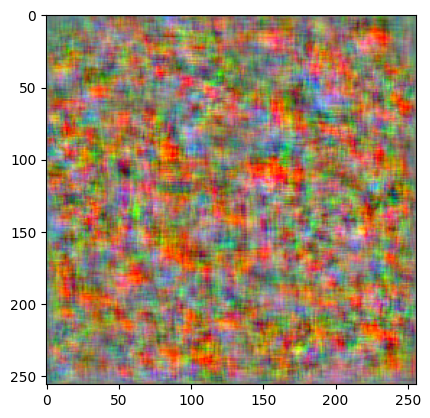

In [7]:
plt.imshow(output)